In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [50]:
data = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')

In [51]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [53]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [54]:
col_name = ['Gender' ,'Vehicle_Age', 'Vehicle_Damage']

In [55]:
for name in col_name:
    data[name] = pd.factorize(data[name])[0]

In [56]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,0,0,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,0,0,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,2,1,27496.0,152.0,39,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


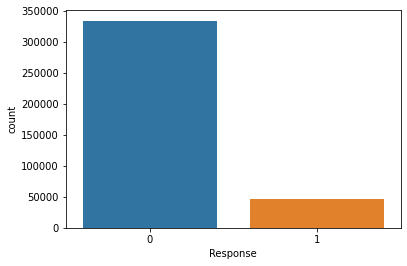

In [57]:
sns.countplot(data['Response'])
plt.show()

In [58]:
class_0_df = data[data['Response']==0]
class_1_df = data[data['Response']==1]

In [59]:
class_0_df.shape

(334399, 12)

In [60]:
class_1_df.shape

(46710, 12)

In [61]:
class_1_df_over = class_1_df.sample(334399,replace=True)

In [62]:
class_1_df_over.shape

(334399, 12)

In [63]:
balanced_df = pd.concat([class_0_df,class_1_df_over],axis=0)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


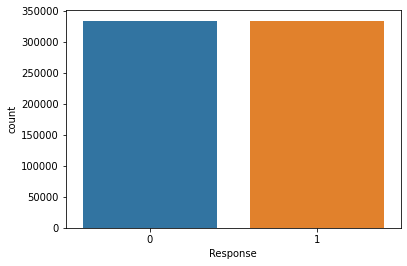

In [64]:
sns.countplot(balanced_df['Response'])
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [66]:
balanced_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,0,76,1,3.0,0,1,1,33536.0,26.0,183,0
3,4,0,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,2,1,27496.0,152.0,39,0
5,6,1,24,1,33.0,0,2,0,2630.0,160.0,176,0
6,7,0,23,1,11.0,0,2,0,23367.0,152.0,249,0


In [67]:
balanced_df[balanced_df['Response'] == 1]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
260759,260760,0,26,1,23.0,0,2,0,18832.0,152.0,177,1
331337,331338,0,36,1,28.0,0,1,0,32784.0,124.0,77,1
143542,143543,1,47,1,28.0,0,0,0,43371.0,26.0,147,1
303751,303752,1,35,1,20.0,0,1,0,2630.0,124.0,156,1
51708,51709,1,37,1,28.0,0,1,1,31089.0,154.0,168,1
...,...,...,...,...,...,...,...,...,...,...,...,...
249850,249851,0,46,1,28.0,0,0,0,2630.0,26.0,68,1
187164,187165,1,57,1,39.0,0,1,0,2630.0,124.0,84,1
316761,316762,1,44,1,24.0,0,1,0,2630.0,124.0,170,1
333888,333889,1,77,1,35.0,0,1,0,2630.0,156.0,119,1


In [68]:
X = balanced_df.iloc[:,1:-1]

In [69]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,0,76,1,3.0,0,1,1,33536.0,26.0,183
3,0,21,1,11.0,1,2,1,28619.0,152.0,203
4,1,29,1,41.0,1,2,1,27496.0,152.0,39
5,1,24,1,33.0,0,2,0,2630.0,160.0,176
6,0,23,1,11.0,0,2,0,23367.0,152.0,249


In [70]:
y = balanced_df['Response']

In [71]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Response, dtype: int64

In [94]:
from sklearn.linear_model import LogisticRegression


In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.50,random_state=1,stratify=y)

In [96]:
lr = LogisticRegression(C=10, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

print("Confusion Matrix\n")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60    167199
           1       0.59      0.55      0.57    167200

    accuracy                           0.59    334399
   macro avg       0.59      0.59      0.59    334399
weighted avg       0.59      0.59      0.59    334399

Confusion Matrix

[[104717  62482]
 [ 76035  91165]]


In [97]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, min_samples_split=5,max_depth=6,
                                max_features = 'auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113753  53446]
 [ 10691 156509]]
Accuracy of our model is:  0.808202177638091
              precision    recall  f1-score   support

           0       0.91      0.68      0.78    167199
           1       0.75      0.94      0.83    167200

    accuracy                           0.81    334399
   macro avg       0.83      0.81      0.81    334399
weighted avg       0.83      0.81      0.81    334399



In [98]:
with open('gbc.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [73]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [74]:
import pickle

In [75]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [76]:
with open('model.sav', 'wb') as f:
    pickle.dump(model, f)

In [77]:
print("Classification Report \n")
print(classification_report(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    167199
           1       0.86      0.99      0.92    167200

    accuracy                           0.91    334399
   macro avg       0.92      0.91      0.91    334399
weighted avg       0.92      0.91      0.91    334399



In [78]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

Confusion Matrix

[[140465  26734]
 [  2026 165174]]


In [100]:
with open('model.pickle', 'rb') as f:
    model_f = pickle.load(f)
input = [0 ,25 ,1 ,35.0 ,0 ,1 ,0 ,2630.0 ,156.0 ,47]
input2 = [0 , 71 , 1 , 3.0 ,0 , 1 , 1, 33536.0 , 26.0 , 183]
input = np.array(input2).reshape(1, -1)

op1 = clf.predict(input)
op1[0]

0

In [81]:
test_data = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

In [82]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [83]:
col_name = ['Gender' ,'Vehicle_Age', 'Vehicle_Damage']
for name in col_name:
    test_data[name] = pd.factorize(test_data[name])[0]


In [84]:
features = test_data.iloc[:,1:]

In [85]:
sc =StandardScaler()
features= sc.fit_transform(features)

In [86]:
Predicted_Response = model.predict(features)

In [87]:
submission_df = pd.DataFrame()

In [88]:
submission_df['id'] = test_data['id']

In [89]:
submission_df['Predicted_Response'] = Predicted_Response

In [90]:
submission_df.head()

,id,Predicted_Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [91]:
submission_df['Predicted_Response'].value_counts()

0    127037
Name: Predicted_Response, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Predicted_Response', ylabel='count'>

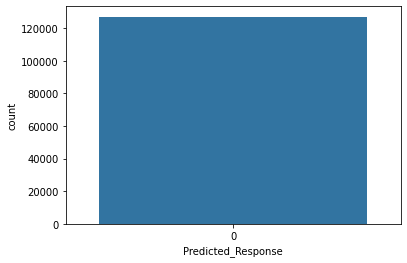

In [92]:
sns.countplot(submission_df['Predicted_Response'])